# Keystroke Dynamics OT2

In [1]:
from keylogParser import *
from stat_helpers import *

bigrams = ['th', 'he', 'gh', 'nd', 'ne', 'in', 'er', 'an', 'ng', 'me', 'we', 'is', 'at', 'on', 'es', 'ay', 'or', 'hi']

results = {}
users = ['oskar', 'johan', 'aoife', 'luke']

# compute statistics for user data
for user in users:
	user_results = get_pressed_data_diffs(bigrams, read_file(user))
	user_stats = get_stats(bigrams, user_results)
	results[user] = user_stats



## Print graphs by statistic for each user

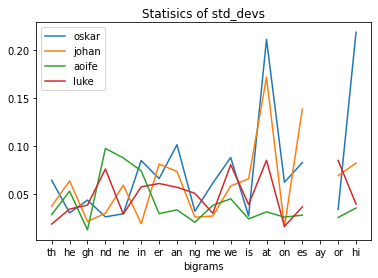

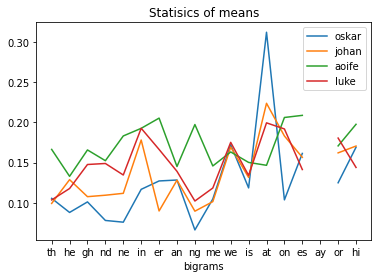

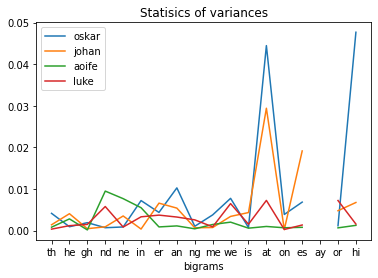

In [2]:
stat_keys = ['std_devs', 'means', 'variances']

for key in stat_keys:
	print_graph(results, key, bigrams, users)
	

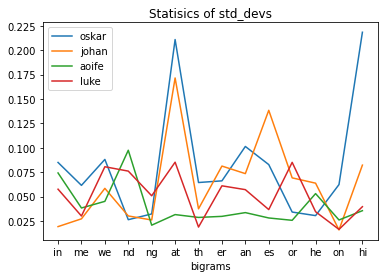

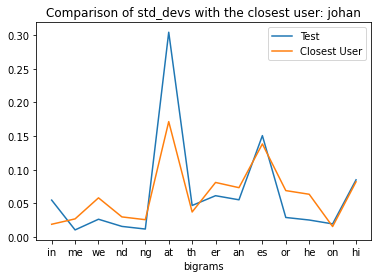

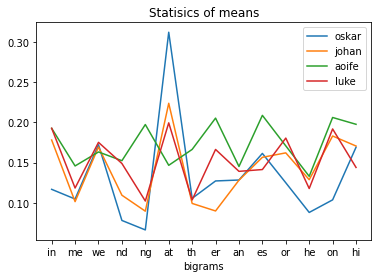

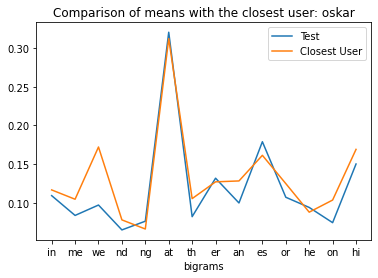

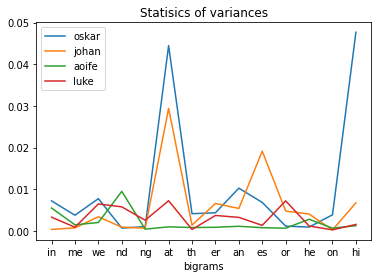

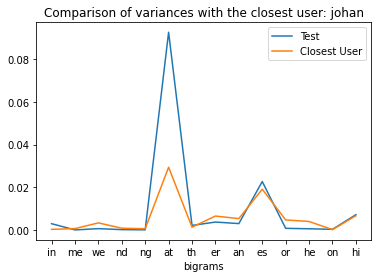

In [4]:
MSE = {}
closest_user = {'std_devs': '', 'means': '', 'variances': ''}

test_results = get_pressed_data_diffs(bigrams, read_file('test'))
test_stats = get_stats(bigrams, test_results)
test_bigrams = test_stats['present_bigrams']

# get common bigrams for all users and test data
common_bigrams = list(set(bigrams) & set(test_bigrams))
for user in users:
	user_bigrams = results[user]['present_bigrams']
	common_bigrams = list(set(common_bigrams) & set(user_bigrams))

# compute mse for the different bigrams towards user data
for user in users:
	MSE[user] = {}
	for stat_key in stat_keys:
		user_stat_array = []
		test_stat_array = []
		for bigram in common_bigrams:
			user_stat_array.append(results[user][stat_key][bigram])
			test_stat_array.append(test_stats[stat_key][bigram])
		MSE[user][stat_key] = mse(user_stat_array, test_stat_array)


for stat_key in stat_keys:
	closest_user[stat_key] = find_closest_user(MSE, stat_key)
	print_graph(results, stat_key, common_bigrams, users)
	print_closest_user_graph(results, test_stats, closest_user[stat_key], stat_key, common_bigrams)

